In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc, gammaincinv, gamma, factorial

In [128]:
# a)

N = 30
w = np.zeros((N + 1, N + 1))

for N1 in range(N + 1):
    yp = N1 + 1 
    yn = N1 - 1
    
    if yp <= N:
        w[yp, N1] = 1 - N1 / N
    if yn >= 0:
        w[yn, N1] = N1 / N


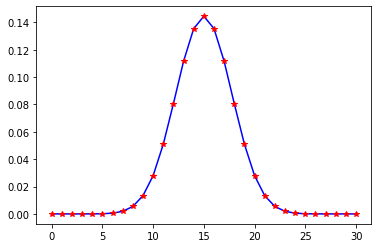

In [129]:
# b)

values, vectors = np.linalg.eig(w)
idx_val = np.where(values == max(values))[0][0]
eig_vec = vectors[:, idx_val] / np.sum(vectors[:, idx_val])


n1 = np.arange(0, N + 1, 1)
p_bin = factorial(N) * 2**(-N) / (factorial(N - n1) * factorial(n1))

plt.figure(1)
plt.plot(n1, p_bin, '-b')
plt.plot(n1, eig_vec, '*r')

plt.show()


15.008888888888889


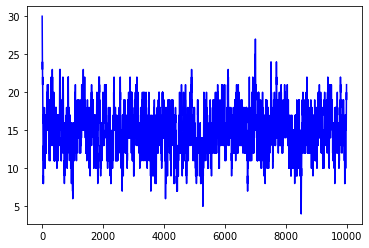

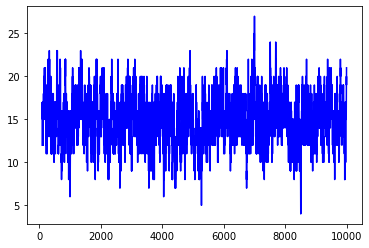

In [142]:
# c)

max_t = 10**4

N1 = np.zeros(max_t)
N1[0] = N

for t in range(max_t - 1):
    w_a = 1 - (N1[t] / N)
    
    if np.random.rand(1) <= w_a:
        N1[t + 1] = N1[t] + 1
    else:
        N1[t + 1] = N1[t] - 1

N1_mean = np.mean(N1[100:])
print(N1_mean)
        
plt.figure(1)
plt.plot(np.arange(0, max_t, 1), N1, '-b')

plt.figure(2)
plt.plot(np.arange(100, max_t, 1), N1[100:], '-b')

plt.show()


Mean error: 0.012711165196792539


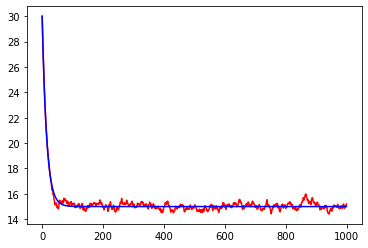

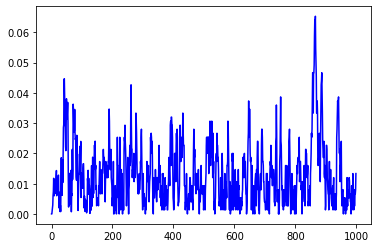

In [157]:
# d)

n_run = 10**2
max_t = 10**3

N1 = np.zeros((n_run, max_t))
N1[:, 0] = N

for run in range(n_run):
    for t in range(max_t - 1):
        w_a = 1 - (N1[run, t] / N)

        if np.random.rand(1) <= w_a:
            N1[run, t + 1] = N1[run, t] + 1
        else:
            N1[run, t + 1] = N1[run, t] - 1
            
N1_mean = np.mean(N1, axis=0)

t = np.arange(0, max_t, 1)
N1_mean_t = (N / 2) * (1 + np.exp(t * np.log(1 - 2 / N)))

error = np.abs(N1_mean_t - N1_mean) / N1_mean_t
print("Mean error:", np.average(error))

plt.figure(1)
plt.plot(t, N1_mean, '-r')
plt.plot(t, N1_mean_t, '-b')

plt.figure(2)
plt.plot(t, error, '-b')

plt.show()
